In [1]:
import os, sys
import healpy as hp
import numpy as np

sys.path.append('../../')
sys.path.append('/DMASS-analysis/measurements/code_py3/')

import esutil
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

from utils import *

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

os.chdir('../../DMASS-analysis/measurements/code_py3/')
print(os.getcwd())

from calling_catalogs import *

rootdir = '/users/PCON0003/warner785/DMASS-analysis/measurements/clustering/'

from ggl_mcal import run_ng_jk, run_nn_jk, run_nk_jk, compute_eix_jk, compute_Rgamma_jk, construct_jk, compute_jkcov, save_results

In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


/users/PCON0003/warner785/DMASS-analysis/measurements/code_py3


In [2]:
def calling_lens_catalog_cut(catname=None):

    catdir = ''.join([ c+'/' for c in catname.split('/')[:-1]])
    os.system('mkdir '+catdir)
    dmass = esutil.io.read(catname)
    w_dmass = dmass['CMASS_PROB']
    print ('Calculating DMASS systematic weights...')
    dmass = appendColumn(dmass, name='WEIGHT', value= w_dmass )
#   dmass = dmass[ dmass['CMASS_PROB'] > 0.01 ]   # for low probability galaxies
    esutil.io.write(catname, dmass)
    #randoms = esutil.io.read('/n/des/lee.5922/data/dmass_cat/random_x50_dmass_spt_masked.fits')
    
    randoms = esutil.io.read('/fs/scratch/PCON0003/warner785/bwarner/random_dmass_y1_public_v1.fits')
#    randoms = esutil.io.read('/users/PCON0003/warner785/DMASSY3/output/test/train_cat/y3/dmass_st82_DET200_randoms.fits')
    
#    catdir = ''.join([ c+'/' for c in catname.split('/')[:-1]])
#    os.system('mkdir '+catdir)
#    dmass = esutil.io.read('/n/des/lee.5922/data/dmass_cat/dmass_spt_sys_v3.fits')
    w_dmass = dmass['CMASS_PROB'] *dmass['SYS_WEIGHT']
    print ('Calculatig DMASS systematic weights...')
    dmass['WEIGHT'] = w_dmass
    dmass = dmass[ dmass['CMASS_PROB'] > 0.01 ]
    
    # find cutoff later
#    dmass = dmass[ dmass['CMASS_PROB'] > 0.01 ]
    esutil.io.write(catname, dmass)
    #randoms = esutil.io.read('/n/des/lee.5922/data/dmass_cat/random_x50_dmass_spt_masked.fits')

#    randoms = esutil.io.read('/n/des/lee.5922/data/dmass_cat/random_x50_dmass_spt_masked.fits')

    print ('Resulting catalog size')
    print ('DMASS=', np.sum(dmass['WEIGHT']) )
    print ('randoms=', randoms.size)
    return dmass, randoms

In [3]:
def calling_lens_catalog(catname=None):

    catdir = ''.join([ c+'/' for c in catname.split('/')[:-1]])
    os.system('mkdir '+catdir)
    dmass = esutil.io.read(catname)
    w_dmass = dmass['CMASS_PROB']
    print ('Calculating DMASS systematic weights...')
    dmass = appendColumn(dmass, name='WEIGHT', value= w_dmass )
#   dmass = dmass[ dmass['CMASS_PROB'] > 0.01 ]   # for low probability galaxies
    esutil.io.write(catname, dmass)
    #randoms = esutil.io.read('/n/des/lee.5922/data/dmass_cat/random_x50_dmass_spt_masked.fits')
    
    randoms = esutil.io.read('/fs/scratch/PCON0003/warner785/bwarner/random_dmass_y1_public_v1.fits')
#    randoms = esutil.io.read('/users/PCON0003/warner785/DMASSY3/output/test/train_cat/y3/dmass_st82_DET200_randoms.fits')
    
#    catdir = ''.join([ c+'/' for c in catname.split('/')[:-1]])
#    os.system('mkdir '+catdir)
#    dmass = esutil.io.read('/n/des/lee.5922/data/dmass_cat/dmass_spt_sys_v3.fits')
    w_dmass = dmass['CMASS_PROB'] *dmass['SYS_WEIGHT']
    print ('Calculatig DMASS systematic weights...')
    dmass['WEIGHT'] = w_dmass
    
    # find cutoff later
#    dmass = dmass[ dmass['CMASS_PROB'] > 0.01 ]
    esutil.io.write(catname, dmass)
    #randoms = esutil.io.read('/n/des/lee.5922/data/dmass_cat/random_x50_dmass_spt_masked.fits')

#    randoms = esutil.io.read('/n/des/lee.5922/data/dmass_cat/random_x50_dmass_spt_masked.fits')

    print ('Resulting catalog size')
    print ('DMASS=', np.sum(dmass['WEIGHT']) )
    print ('randoms=', randoms.size)
    return dmass, randoms

In [4]:
dmass_val, randoms = calling_lens_catalog('../../../DMASSY3/output/test/train_cat/y3/dmass_sys_weight_val_FULL_lin.fits')
print(dmass_val.dtype.names)

Calculating DMASS systematic weights...
Calculatig DMASS systematic weights...
Resulting catalog size
DMASS= 27618.543122842555
randoms= 5864645
('COADD_OBJECT_ID', 'RA', 'DEC', 'HPIX_4096', 'MAG_DETMODEL_G', 'MAGERR_DETMODEL_G', 'MAG_DETMODEL_R', 'MAGERR_DETMODEL_R', 'MAG_DETMODEL_I', 'MAGERR_DETMODEL_I', 'MAG_DETMODEL_Z', 'MAGERR_DETMODEL_Z', 'MOF_CM_MAG_ERR_G', 'MOF_CM_MAG_ERR_R', 'MOF_CM_MAG_ERR_I', 'MOF_CM_MAG_ERR_Z', 'MOF_CM_MAG_CORRECTED_G', 'MOF_CM_MAG_CORRECTED_R', 'MOF_CM_MAG_CORRECTED_I', 'MOF_CM_MAG_CORRECTED_Z', 'SOF_CM_MAG_ERR_G', 'SOF_CM_MAG_ERR_R', 'SOF_CM_MAG_ERR_I', 'SOF_CM_MAG_ERR_Z', 'SOF_CM_MAG_CORRECTED_G', 'SOF_CM_MAG_CORRECTED_R', 'SOF_CM_MAG_CORRECTED_I', 'SOF_CM_MAG_CORRECTED_Z', 'EXTENDED_CLASS_MASH_SOF', 'CMASS_PROB', 'WEIGHT', 'SYS_WEIGHT')


In [5]:
dmass_val_cut, randoms = calling_lens_catalog_cut('../../../DMASSY3/output/test/train_cat/y3/dmass_sys_weight_val_FULL_lin.fits')
print(dmass_val_cut.dtype.names)

Calculating DMASS systematic weights...
Calculatig DMASS systematic weights...
Resulting catalog size
DMASS= 26735.92056563343
randoms= 5864645
('COADD_OBJECT_ID', 'RA', 'DEC', 'HPIX_4096', 'MAG_DETMODEL_G', 'MAGERR_DETMODEL_G', 'MAG_DETMODEL_R', 'MAGERR_DETMODEL_R', 'MAG_DETMODEL_I', 'MAGERR_DETMODEL_I', 'MAG_DETMODEL_Z', 'MAGERR_DETMODEL_Z', 'MOF_CM_MAG_ERR_G', 'MOF_CM_MAG_ERR_R', 'MOF_CM_MAG_ERR_I', 'MOF_CM_MAG_ERR_Z', 'MOF_CM_MAG_CORRECTED_G', 'MOF_CM_MAG_CORRECTED_R', 'MOF_CM_MAG_CORRECTED_I', 'MOF_CM_MAG_CORRECTED_Z', 'SOF_CM_MAG_ERR_G', 'SOF_CM_MAG_ERR_R', 'SOF_CM_MAG_ERR_I', 'SOF_CM_MAG_ERR_Z', 'SOF_CM_MAG_CORRECTED_G', 'SOF_CM_MAG_CORRECTED_R', 'SOF_CM_MAG_CORRECTED_I', 'SOF_CM_MAG_CORRECTED_Z', 'EXTENDED_CLASS_MASH_SOF', 'CMASS_PROB', 'WEIGHT', 'SYS_WEIGHT')


In [6]:
def keepGoodRegion(des, hpInd = False, balrog=None):
    import healpy as hp
    import fitsio
    # 25 is the faintest object detected by DES
    # objects larger than 25 considered as Noise
    
    path = '/fs/scratch/PCON0003/warner785/bwarner/'
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v2_il22_seeil4.0_nside4096ring_redlimcut.fits')
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits')
    LSSGoldmask = fitsio.read(path+'MASK_Y3LSSBAOSOF_22_3_v2p2.fits')
    ringhp = hp.nest2ring(4096, [LSSGoldmask['PIXEL']])
    #Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits
    #frac_cut = LSSGoldmask['FRAC'] > 0.8
    #ind_good_ring = LSSGoldmask['PIXEL'][frac_cut]
    ind_good_ring = ringhp
    
    # healpixify the catalog.
    nside=4096
    # Convert silly ra/dec to silly HP angular coordinates.
    phi = des['RA'] * np.pi / 180.0
    theta = ( 90.0 - des['DEC'] ) * np.pi/180.0

    hpInd = hp.ang2pix(nside,theta,phi,nest=False)
    keep = np.in1d(hpInd, ind_good_ring)
    des = des[keep]
    if hpInd is True:
        return ind_good_ring
    else:
        return des

In [7]:
def ra_dec_to_xyz(ra, dec):
    """Convert ra & dec to Euclidean points
    Parameters
    ----------
    ra, dec : ndarrays
    Returns
    x, y, z : ndarrays
    """
    sin_ra = np.sin(ra * np.pi / 180.)
    cos_ra = np.cos(ra * np.pi / 180.)

    sin_dec = np.sin(np.pi / 2 - dec * np.pi / 180.)
    cos_dec = np.cos(np.pi / 2 - dec * np.pi / 180.)

    return (cos_ra * sin_dec,
            sin_ra * sin_dec,
            cos_dec)

def uniform_sphere(RAlim, DEClim, size=1):
    """Draw a uniform sample on a sphere
    Parameters
    ----------
    RAlim : tuple
        select Right Ascension between RAlim[0] and RAlim[1]
        units are degrees
    DEClim : tuple
        select Declination between DEClim[0] and DEClim[1]
    size : int (optional)
        the size of the random arrays to return (default = 1)
    Returns
    -------
    RA, DEC : ndarray
        the random sample on the sphere within the given limits.
        arrays have shape equal to size.
    """
    zlim = np.sin(np.pi * np.asarray(DEClim) / 180.)

    z = zlim[0] + (zlim[1] - zlim[0]) * np.random.random(size)
    DEC = (180. / np.pi) * np.arcsin(z)
    RA = RAlim[0] + (RAlim[1] - RAlim[0]) * np.random.random(size)
    
    return RA, DEC

def uniform_random_on_sphere(data, size = None ):
    ra = data['RA']
    dec = data['DEC']
    
    n_features = ra.size
    #size = 100 * data.size
    
    # draw a random sample with N points
    ra_R, dec_R = uniform_sphere((min(ra), max(ra)),
                                 (min(dec), max(dec)),
                                 size)
    #data = np.asarray(ra_dec_to_xyz(ra, dec), order='F').T
    #data_R = np.asarray(ra_dec_to_xyz(ra_R, dec_R), order='F').T
    
    #random redshift distribution
    
    data_R = np.zeros((ra_R.size,), dtype=[('RA', 'float'), ('DEC', 'float')])
    data_R['RA'] = ra_R
    data_R['DEC'] = dec_R
                              
    return data_R

## ---------------------------------------------
## generate randoms in a dmass region
random_create = uniform_random_on_sphere(dmass_val, size = 50 * dmass_val.size)
# applying LSS mask 
random_create = keepGoodRegion(random_create)

random_cut = uniform_random_on_sphere(dmass_val_cut, size = 50 * dmass_val_cut.size)
random_cut = keepGoodRegion(random_create)

#mask = (gold_st82['RA']>310) & (gold_st82['RA']<360)|(gold_st82['RA']<7)
#mask = mask & (gold_st82['DEC']>-10) & (gold_st82['DEC']<10)
#gold_st82_train = gold_st82[mask]

In [8]:
randomsind_create = np.random.choice( random_create.size, size=int(random_create.size/3.) )
random_create = random_create[randomsind_create]

randomsind_cut = np.random.choice( random_cut.size, size=int(random_cut.size/3.) )
random_cut = random_cut[randomsind_cut]

In [9]:
def treecorr_xi(lens, random=None, filename=None, rootdir=None, 
		nbins=20, min_sep=2.5, max_sep=250, sep_units='arcmin', bin_slop=0.05, 
        npatch=10, var_method='jackknife', cen_file = None):
    
    import treecorr

    if cen_file != None:
        if os.path.exists(cen_file):
            print ('Saved cen_file exists:',cen_file)
            cen_file_switch_on = cen_file
            npatch=1
        else : 
            print ('Create cen_file=',cen_file)
            cen_file_switch_on = None

    #temp_dir=filename.split('.txt')[0]
    cat_l = treecorr.Catalog(ra=lens['RA'], dec=lens['DEC'], w=lens['WEIGHT'], 
                             ra_units='deg', dec_units='deg', npatch=npatch, 
                             patch_centers=cen_file_switch_on )

    if cen_file_switch_on == None : 
        cat_l.write_patch_centers(cen_file)
#changed to make weights = 1 for randoms
    from numpy.lib.recfunctions import append_fields
    weights = np.zeros(len(random))
    for x in range(len(random)-1):
        weights[x]=1
    random = append_fields(random, 'WEIGHT', weights, usemask=False)
    
    cat_r = treecorr.Catalog(ra=random['RA'], dec=random['DEC'], w=random['WEIGHT'], 
                             ra_units='deg', dec_units='deg', 
                             patch_centers=cen_file_switch_on )
    
    dd = treecorr.NNCorrelation(nbins=nbins, min_sep=min_sep,
                            max_sep=max_sep, sep_units=sep_units, bin_slop=bin_slop, 
                            var_method=var_method,
                            num_threads=30, verbose=1)
    dr = treecorr.NNCorrelation(nbins=nbins, min_sep=min_sep,
                                max_sep=max_sep, sep_units=sep_units, bin_slop=bin_slop, 
                                var_method=var_method,
                                num_threads=30, verbose=1)
    rd = treecorr.NNCorrelation(nbins=nbins, min_sep=min_sep,
                                max_sep=max_sep, sep_units=sep_units, bin_slop=bin_slop, 
                                var_method=var_method,
                                num_threads=30, verbose=1)
    rr = treecorr.NNCorrelation(nbins=nbins, min_sep=min_sep,
                                max_sep=max_sep, sep_units=sep_units, bin_slop=bin_slop, 
                                var_method=var_method,
                                num_threads=30, verbose=1)

    dd.process(cat_l)
    dr.process(cat_l, cat_r)
    rd.process(cat_r, cat_l)
    rr.process(cat_r)
    xi,varxi = dd.calculateXi(rr,dr)
    dd.write(filename,rr,dr,rd)
    
    cov_jk = dd.estimate_cov(var_method)
    cov_filename=filename.split('.txt')[0]+'.cov'
    np.savetxt(cov_filename, cov_jk)
    
    print ('save to', filename)
    
# search for VETO in run_DMASS
# ask Su about this, if not

In [ ]:
npatch=80
tempdir = rootdir+'/{}/'.format(npatch)
cen_file = tempdir + 'nn_cen_file.txt'
filename = tempdir + 'nn.lens.txt'

#os.system('mkdir '+savedir)
#print (os.path.exists(tempdir) )
os.system('rm -rf '+tempdir)
os.system('mkdir '+tempdir)

# default of poisson errors -- try this
# ***save to different variables to compare different methods of errors

treecorr_xi(dmass_val, random=random_create,
        filename=filename, rootdir = tempdir, 
        nbins=20, min_sep=2.5, max_sep=250., sep_units='arcmin', bin_slop=0.05,
        npatch=npatch, cen_file=cen_file, var_method='jackknife')

cov_new_dmass= np.genfromtxt(tempdir+'/nn.lens.cov'.format(npatch))
_, meanr, _, galaxy_xi, xi_err,_,_,_,_,_ = np.genfromtxt(tempdir+'nn.lens.txt'.format(npatch), unpack=True)

Create cen_file= /users/PCON0003/warner785/DMASS-analysis/measurements/clustering//80/nn_cen_file.txt


In [11]:
#Other dmass-- Prob Cut

npatch=80
tempdir = rootdir+'/{}/'.format(npatch)
cen_file = tempdir + 'nn_cen_file_cut.txt'
filename = tempdir + 'nn.lens_cut.txt'

#os.system('mkdir '+savedir)
#print (os.path.exists(tempdir) )
os.system('rm -rf '+tempdir)
os.system('mkdir '+tempdir)

# default of poisson errors -- try this
# ***save to different variables to compare different methods of errors

treecorr_xi(dmass_val_cut, random=random_cut,
        filename=filename, rootdir = tempdir, 
        nbins=20, min_sep=2.5, max_sep=250., sep_units='arcmin', bin_slop=0.05,
        npatch=npatch, cen_file=cen_file, var_method='jackknife')

cov_new_dmass_cut= np.genfromtxt(tempdir+'/nn.lens_cut.cov'.format(npatch))
_, meanr_cut, _, galaxy_xi_cut, xi_err_cut,_,_,_,_,_ = np.genfromtxt(tempdir+'nn.lens_cut.txt'.format(npatch), unpack=True)

save to /users/PCON0003/warner785/DMASS-analysis/measurements/clustering//80/nn.lens_cut.txt


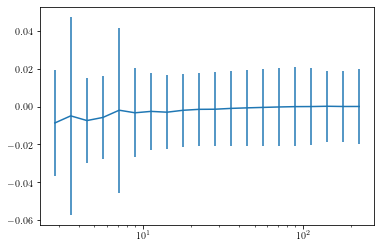

In [12]:
#difference:

fig, ax = plt.subplots()

ax.errorbar( meanr, (galaxy_xi-galaxy_xi_cut), xi_err )
ax.set_xscale('log')

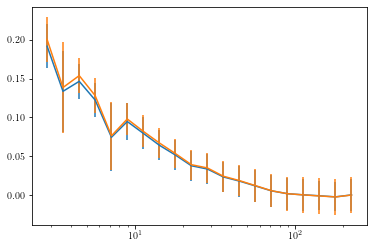

In [13]:
# plotted together:

fig, ax = plt.subplots()

ax.errorbar( meanr, galaxy_xi, xi_err )
ax.errorbar( meanr_cut, galaxy_xi_cut, xi_err_cut )
ax.set_xscale('log')

In [14]:
# compare against CMASS:

import fitsio
cmass = esutil.io.read('/fs/scratch/PCON0008/warner785/bwarner/matched_cmass.fits')

print(cmass.size)

60037


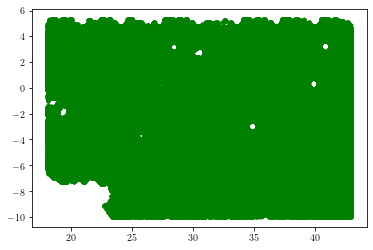

In [15]:
#validation region
# convert
mask4 =(cmass['RA']>18)&(cmass['RA']<43)
mask4 = mask4 & (cmass['DEC']>-10) & (cmass['DEC']<10)
cmass = cmass[mask4]

from numpy.lib.recfunctions import append_fields
weights = np.zeros(len(cmass))
for x in range(len(cmass)-1):
    weights[x]=1
cmass = append_fields(cmass, 'WEIGHT', weights, usemask=False)

random_cmass = uniform_random_on_sphere(cmass, size = 50 * cmass.size)
# applying LSS mask 
random_cmass = keepGoodRegion(random_cmass)

fig, ax = plt.subplots()
ax.plot( cmass['RA'], cmass['DEC'], "b.")
ax.plot(random_cmass['RA'], random_cmass['DEC'], "g.")

In [16]:
randomsind_cmass = np.random.choice( random_cmass.size, size=int(random_cmass.size/3.) )
random_cmass = random_cmass[randomsind_cmass]

In [17]:
npatch=80
tempdir = rootdir+'/{}/'.format(npatch)
cen_file = tempdir + 'nn_cen_file_cmass.txt'
filename = tempdir + 'nn.lens_cmass.txt'

#os.system('mkdir '+savedir)
#print (os.path.exists(tempdir) )
os.system('rm -rf '+tempdir)
os.system('mkdir '+tempdir)

# default of poisson errors -- try this
# ***save to different variables to compare different methods of errors

treecorr_xi(cmass, random=random_cmass,
        filename=filename, rootdir = tempdir, 
        nbins=20, min_sep=2.5, max_sep=250., sep_units='arcmin', bin_slop=0.05,
        npatch=npatch, cen_file=cen_file, var_method='jackknife')

cov_new= np.genfromtxt(tempdir+'/nn.lens_cmass.cov'.format(npatch))
_, meanr_cmass, _, galaxy_xi_cmass, xi_err_cmass,_,_,_,_,_ = np.genfromtxt(tempdir+'nn.lens_cmass.txt'.format(npatch), unpack=True)

Create cen_file= /users/PCON0003/warner785/DMASS-analysis/measurements/clustering//80/nn_cen_file_cmass.txt
save to /users/PCON0003/warner785/DMASS-analysis/measurements/clustering//80/nn.lens_cmass.txt


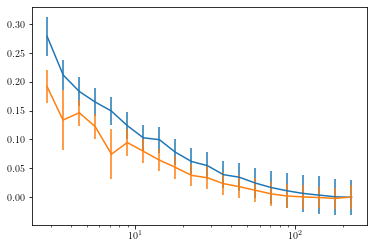

In [18]:
# plot up against CMASS

fig, ax = plt.subplots()

#ax.loglog(theta, galaxy_xi_theory)
#ax.errorbar( theta, galaxy_xi_theory, np.sqrt(cov.diagonal()))
ax.errorbar( meanr_cmass, galaxy_xi_cmass, xi_err_cmass )
ax.errorbar( meanr, galaxy_xi, xi_err)
ax.set_xscale('log')

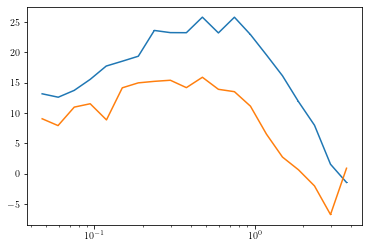

In [21]:
# fix units to be like Y1 paper:

fig, ax = plt.subplots()

#ax.loglog(theta, galaxy_xi_theory)
#ax.errorbar( theta, galaxy_xi_theory, np.sqrt(cov.diagonal()))
ax.errorbar( meanr_cmass/60, 1000*galaxy_xi_cmass*(meanr_cmass/60), xi_err_cmass )
ax.errorbar( meanr/60, 1000*galaxy_xi*(meanr/60),xi_err)
ax.set_xscale('log')